# Netflix: 🎥 & 📺 EDA Notebook

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('netflix_titles.csv')

# Handling Missing Vslues

In [2]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [3]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
# so i am filling missing vlues in categorical data with the hepl of mode
df['director'] = df['director'].fillna(df['director'].mode()[0])
df['cast'] = df['cast'].fillna(df['cast'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])


In [5]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Trending_movie_analysisng

In [6]:
df['rating'].unique()
df['title'].unique()

array(['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', ...,
       'Zombieland', 'Zoom', 'Zubaan'], dtype=object)

In [7]:
# Group by 'title' and 'rating' and count occurrences
df1 = df.groupby(['title', 'rating']).size().reset_index(name='count')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converting date

In [9]:
df['date_added'].unique()

array(['September 25, 2021', 'September 24, 2021', 'September 23, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [10]:
df['date_added']=df['date_added'].str.strip()

In [11]:
df['date_added']=pd.to_datetime(df['date_added'],format='%B %d, %Y')

In [12]:
df['month'] = df['date_added'].dt.month

In [13]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9


# Extract year from 'date_added'

In [14]:
group_tile_date=df.groupby('date_added')['title'].count()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

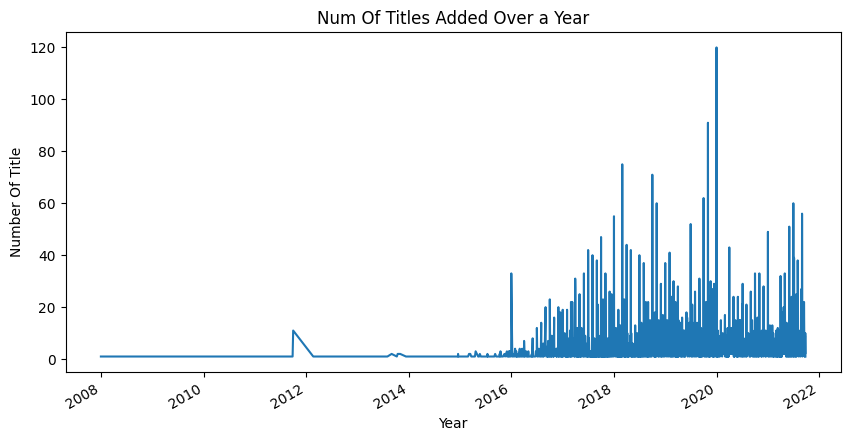

In [16]:
plt.figure(figsize=(10,5))
group_tile_date.plot(kind='line')
plt.title('Num Of Titles Added Over a Year')
plt.xlabel('Year')
plt.ylabel('Number Of Title')
plt.show()

# Extract year from 'date_added'

In [17]:
# exstracting year from date column
df['year_added'] = df['date_added'].dt.year

# Plotting Visual Charts

In [18]:
Title_counts_year=df.groupby('year_added')['title'].count()

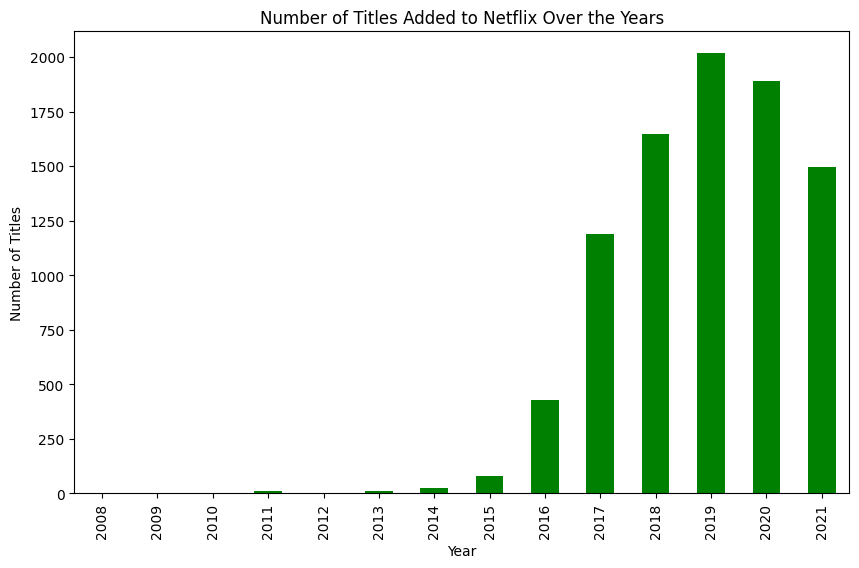

In [19]:
# Plot the trend
plt.figure(figsize=(10, 6))
Title_counts_year.plot(kind='bar', color='green')
plt.title('Number of Titles Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

In [20]:
Title_counts_year

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1889
2021    1498
Name: title, dtype: int64

In [37]:
# who have released most of the films in 2021

In [42]:
trending_director=df.groupby('year_added')['director'].count()
trending_director

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1889
2021    1498
Name: director, dtype: int64

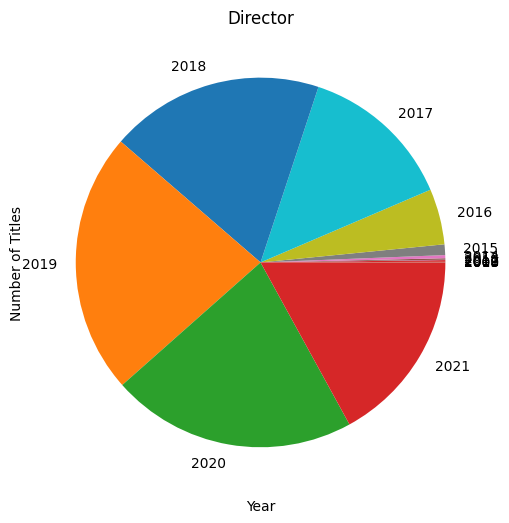

In [46]:

plt.figure(figsize=(10, 6))
trending_director.plot(kind='pie', color='green')
plt.title('Director')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

In [53]:
duration=df.groupby('release_year')['duration'].count()
duration

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: duration, Length: 74, dtype: int64

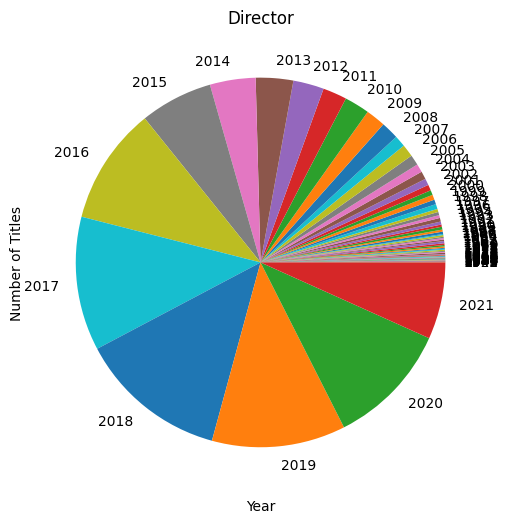

In [54]:
plt.figure(figsize=(10, 6))
duration.plot(kind='pie', color='green')
plt.title('Director')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()